In [ ]:
#imports

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Reference for parameters that are being varied 

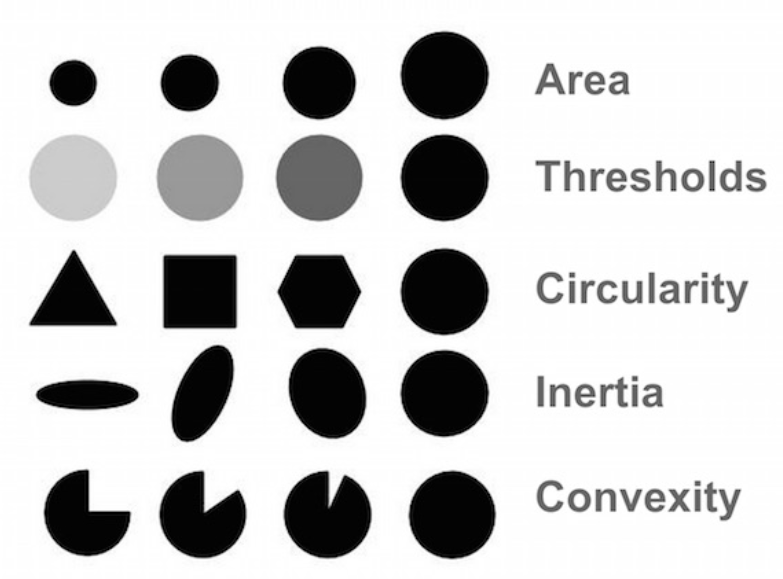

In [ ]:
def get_keypoints(image):
  
  params = cv2.SimpleBlobDetector_Params()

# Define thresholds
#Can define thresholdStep. See documentation. 
  params.minThreshold = 0
  params.maxThreshold = 255

# Filter by Area.
  params.filterByArea = True
  params.minArea = 30
  params.maxArea = 10000

# Filter by Color (black=0)
  params.filterByColor = False  #Set true for cast_iron as we'll be detecting black regions
  params.blobColor = 0

# Filter by Circularity
  params.filterByCircularity = False
  params.minCircularity = 0.5
  params.maxCircularity = 1

# Filter by Convexity
  params.filterByConvexity = False
  params.minConvexity = 0.7
  params.maxConvexity = 1

# Filter by InertiaRatio
  params.filterByInertia = True
  params.minInertiaRatio = 0
  params.maxInertiaRatio = 1

# Distance Between Blobs
  params.minDistBetweenBlobs = 0

# Setup the detector with parameters
  detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
  keypoints = detector.detect(image)

  print("Number of blobs detected are : ", len(keypoints))
# Draw blobs
  img_with_blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  #plt.imshow(img_with_blobs)
  cv2_imshow(img_with_blobs)
  return keypoints
  

In [ ]:
#find out the max radius blob
#also detects the outlier blob
#if these two are the same, then - it means theres a dominant follicle

def get_outlier(keypoints, image):
  #getting the max radius
  kp_max = 0
  if len(keypoints) > 0:
    kp_max = keypoints[0]
    for kp in keypoints:
      if kp.size > kp_max.size:
        kp_max = kp

  ##anomaly detection
  keypoints_radius = np.array([each.size for each in keypoints])
  mean = np.mean(keypoints_radius) 
  #print(mean)
# calculate standard deviation
  sd = np.std(keypoints_radius)
  #print(sd)
# determine a threhold
  threshold = 2.5
# create empty list to store outliers
  outliers = []

# detect outlier
  for (i,keypt) in zip(keypoints_radius,keypoints): 
    z = (i-mean)/sd # calculate z-score
    if abs(z) > threshold:
      outliers.append(keypt) # add to the empty list

  if len(outliers)!=0:
    if len(outliers) == 1 and kp_max == outliers[0]:
      print("NON PCOS")
      return 0
    else:
      print("PCOS")
      return 1

  else:
    print("PCOS")
    return 1
  #print(outliers)
  # draw circle around the largest blob
  if kp_max!=0:
    image2 = cv2.circle(image,(int(kp_max.pt[0]),int(kp_max.pt[1])),int(kp_max.size),(255,255,255),2) ##kp_max.pt -- coordinates of centre
    cv2_imshow(image2)
  #img_with_blobs = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  #plt.imshow(img_with_blobs)
  #cv2_imshow(img_with_blobs)

 



In [ ]:
import os

In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/masters/fuzzy system/github/data/preprocesses images'
images = os.listdir(path)

In [1]:
#Sample image

Number of blobs detected are :  18


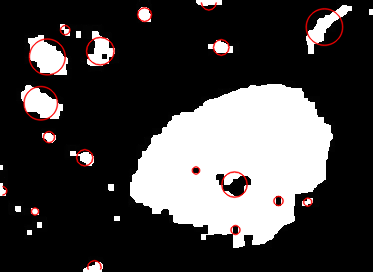

PCOS


1

In [ ]:
im = cv2.imread('/content/drive/MyDrive/masters/fuzzy system/github/data/preprocesses images/1267014891_1_capture.jpg', 0)
kernel = np.ones((5,5), np.uint8)
im = cv2.dilate(im, kernel, iterations=1)
im = cv2.erode(im, kernel, iterations=1)
get_outlier(get_keypoints(im), im)

In [ ]:
results = pd.DataFrame()

In [ ]:
results['image_path'] = [path+'/'+each for each in images]

In [ ]:
results

,image_path
0,/content/drive/MyDrive/masters/fuzzy system/da...
1,/content/drive/MyDrive/masters/fuzzy system/da...
2,/content/drive/MyDrive/masters/fuzzy system/da...
3,/content/drive/MyDrive/masters/fuzzy system/da...
4,/content/drive/MyDrive/masters/fuzzy system/da...
5,/content/drive/MyDrive/masters/fuzzy system/da...
6,/content/drive/MyDrive/masters/fuzzy system/da...
7,/content/drive/MyDrive/masters/fuzzy system/da...
8,/content/drive/MyDrive/masters/fuzzy system/da...
9,/content/drive/MyDrive/masters/fuzzy system/da...


In [ ]:
results.to_csv('results.csv')

In [ ]:
#getting answers for all images in the dataset

Number of blobs detected are :  16


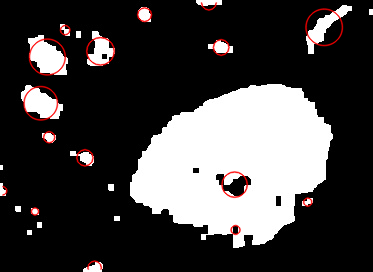

PCOS
Number of blobs detected are :  4


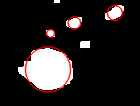

PCOS
Number of blobs detected are :  22


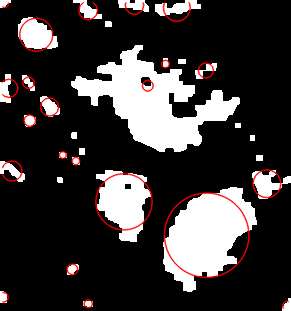

NON PCOS
Number of blobs detected are :  2


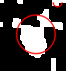

PCOS
Number of blobs detected are :  19


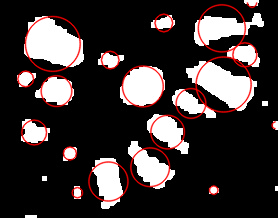

PCOS
Number of blobs detected are :  29


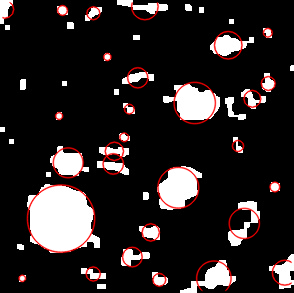

NON PCOS
Number of blobs detected are :  27


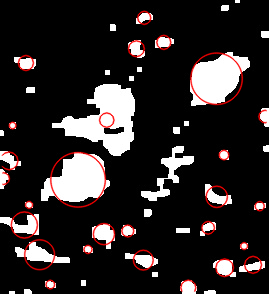

PCOS
Number of blobs detected are :  9


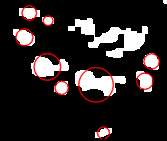

PCOS
Number of blobs detected are :  11


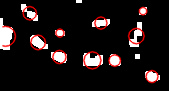

PCOS
Number of blobs detected are :  13


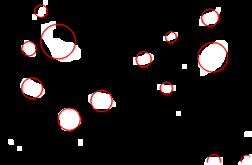

PCOS
Number of blobs detected are :  10


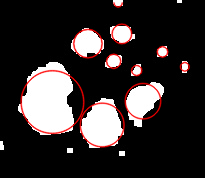

PCOS
Number of blobs detected are :  5


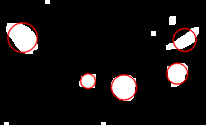

PCOS
Number of blobs detected are :  18


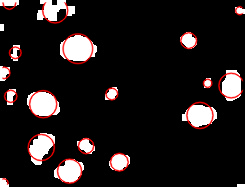

PCOS
Number of blobs detected are :  16


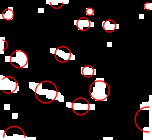

PCOS
Number of blobs detected are :  12


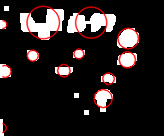

PCOS
Number of blobs detected are :  12


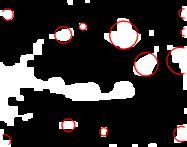

PCOS
Number of blobs detected are :  8


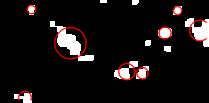

PCOS
Number of blobs detected are :  8


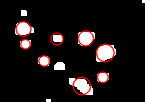

PCOS
Number of blobs detected are :  4


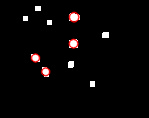

PCOS
Number of blobs detected are :  11


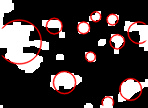

NON PCOS
Number of blobs detected are :  5


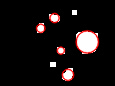

PCOS
Number of blobs detected are :  0


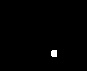

PCOS
Number of blobs detected are :  3


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


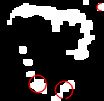

PCOS
Number of blobs detected are :  1


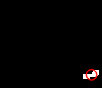

PCOS
Number of blobs detected are :  17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


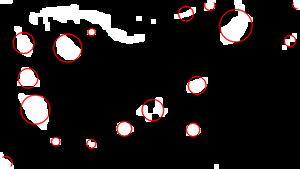

PCOS
Number of blobs detected are :  14


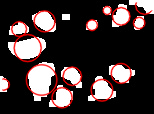

PCOS
Number of blobs detected are :  23


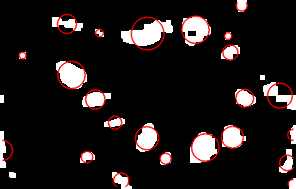

PCOS
Number of blobs detected are :  6


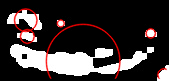

PCOS
Number of blobs detected are :  32


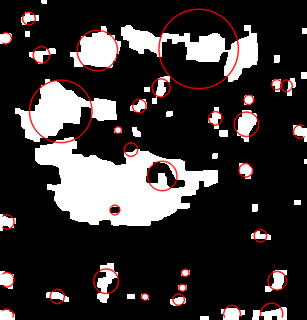

PCOS
Number of blobs detected are :  46


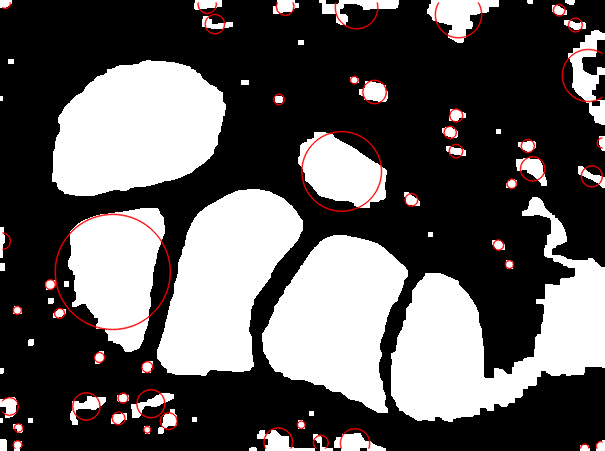

PCOS
Number of blobs detected are :  15


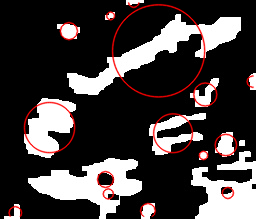

NON PCOS
Number of blobs detected are :  4


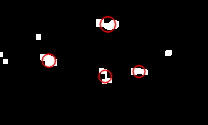

PCOS
Number of blobs detected are :  10


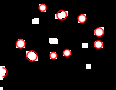

PCOS
Number of blobs detected are :  7


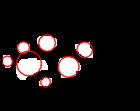

PCOS
Number of blobs detected are :  20


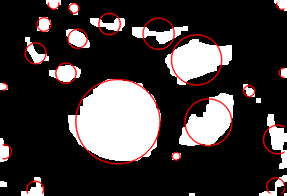

NON PCOS
Number of blobs detected are :  70


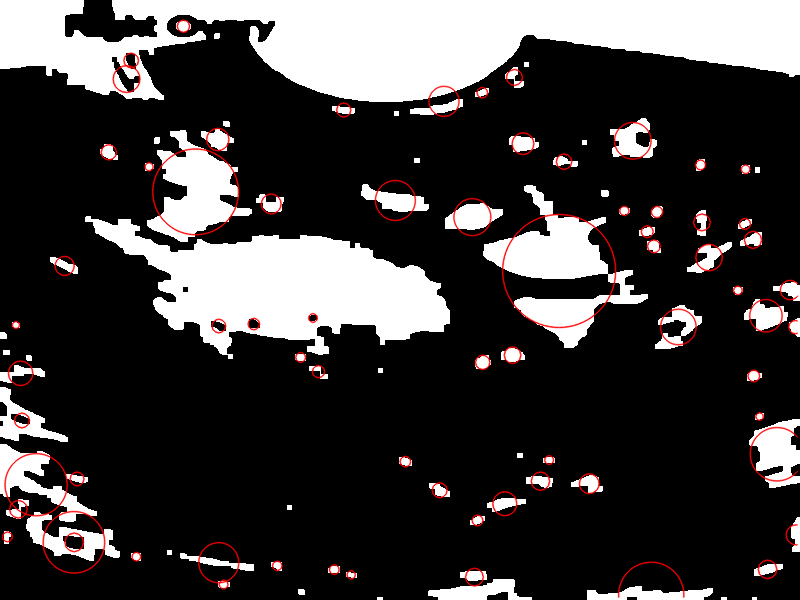

PCOS
Number of blobs detected are :  31


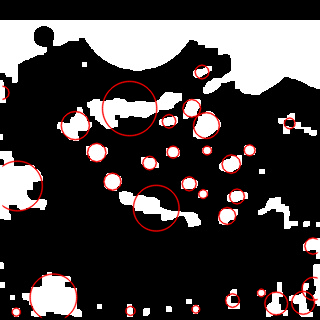

NON PCOS
Number of blobs detected are :  16


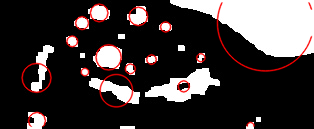

NON PCOS


In [ ]:
pcos = 0
for im in images:
  im = cv2.imread(path+'/'+im, 0)
  #kernel = np.ones((5,5), np.uint8)
  #im = cv2.dilate(im, kernel, iterations=1)
  pcos += get_outlier(get_keypoints(im), im)

In [ ]:
pcos

32